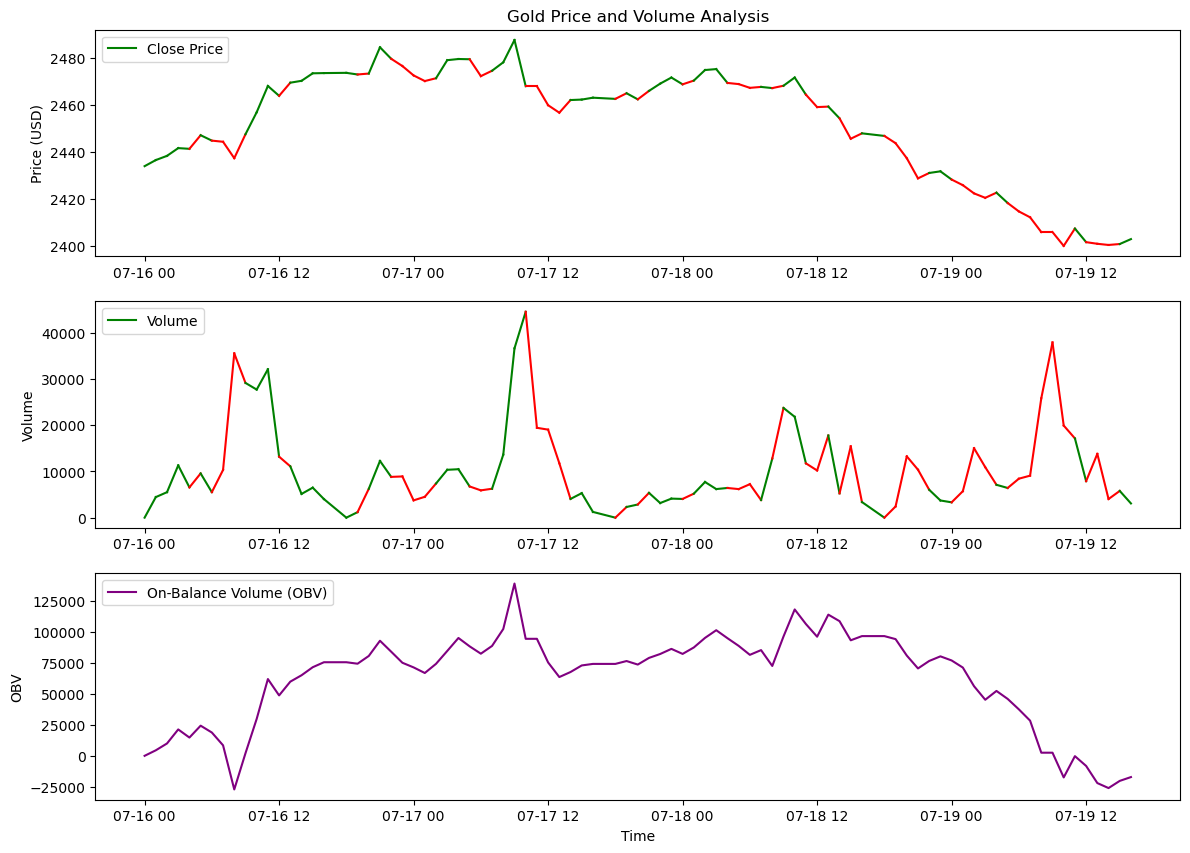

Overall, there was more selling demand.
Currently, there is more buying demand.


In [132]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch the latest hourly data
gold = yf.Ticker("GC=F")
data = gold.history(period="5d", interval="1h")

# Calculate OBV
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).fillna(0).cumsum()

# Determine colors for line segments
colors = ['green' if data['Close'].iloc[i] > data['Close'].iloc[i-1] else 'red' for i in range(1, len(data))]
colors.insert(0, 'green')  # First line segment

# Plot price data with colored line segments
plt.figure(figsize=(14, 10))

# Plot the closing prices with colors
plt.subplot(3, 1, 1)
for i in range(1, len(data)):
    plt.plot(data.index[i-1:i+1], data['Close'].iloc[i-1:i+1], color=colors[i-1])
plt.title('Gold Price and Volume Analysis')
plt.ylabel('Price (USD)')
plt.legend(['Close Price'], loc='upper left')

# Plot the volume data with colored line segments
plt.subplot(3, 1, 2)
for i in range(1, len(data)):
    plt.plot(data.index[i-1:i+1], data['Volume'].iloc[i-1:i+1], color=colors[i-1])
plt.ylabel('Volume')
plt.legend(['Volume'], loc='upper left')

# Plot OBV
plt.subplot(3, 1, 3)
plt.plot(data.index, data['OBV'], label='On-Balance Volume (OBV)', color='purple')
plt.ylabel('OBV')
plt.legend(loc='upper left')
plt.xlabel('Time')

plt.show()

# Analyzing the results
# Summary of buying vs. selling pressure
if data['OBV'].iloc[-1] > data['OBV'].iloc[0]:
    print("Overall, there was more buying demand.")
else:
    print("Overall, there was more selling demand.")

# Current demand analysis
if data['Close'].iloc[-1] > data['Close'].iloc[-2]:
    current_demand = "Buying"
    print("Currently, there is more buying demand.")
else:
    current_demand = "Selling"
    print("Currently, there is more selling demand.")


In [138]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch the latest hourly data for the past 60 days
gold = yf.Ticker("GC=F")
data = gold.history(period="5d", interval="1h")

# Create lagged features
data['lag1'] = data['Close'].shift(1)
data['lag2'] = data['Close'].shift(2)
data = data.dropna()

# Features and target variable
X = data[['lag1', 'lag2']]
y = data['Close']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict the next hour's closing price
last_lag1 = data['Close'].iloc[-1]
last_lag2 = data['Close'].iloc[-2]
next_hour_prediction = model.predict([[last_lag1, last_lag2]])
print(f"Predicted next hour's closing price: {next_hour_prediction[0]}")


Mean Squared Error: 21.751257310074816
Predicted next hour's closing price: 2402.5164693586703


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


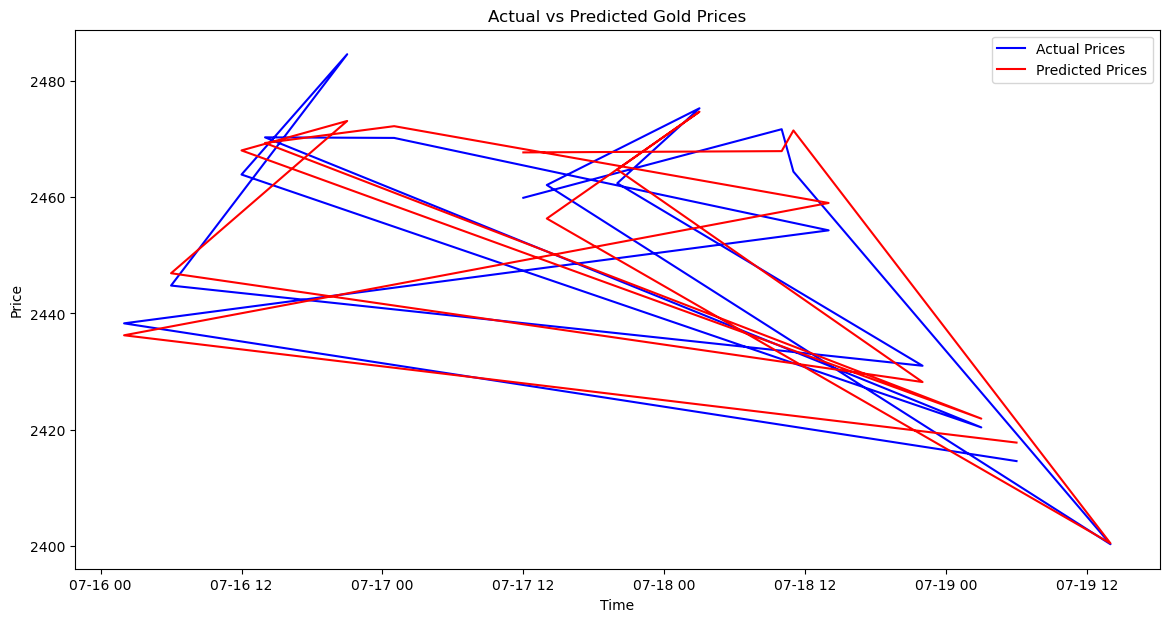

In [148]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='-')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   86
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -253.452
Date:                Sun, 21 Jul 2024   AIC                            518.905
Time:                        14:45:40   BIC                            533.561
Sample:                             0   HQIC                           524.800
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0022      0.098     -0.023      0.982      -0.195       0.190
ar.L2          0.1016      0.113      0.900      0.368      -0.120       0.323
ar.L3         -0.1393      0.099     -1.402      0.1

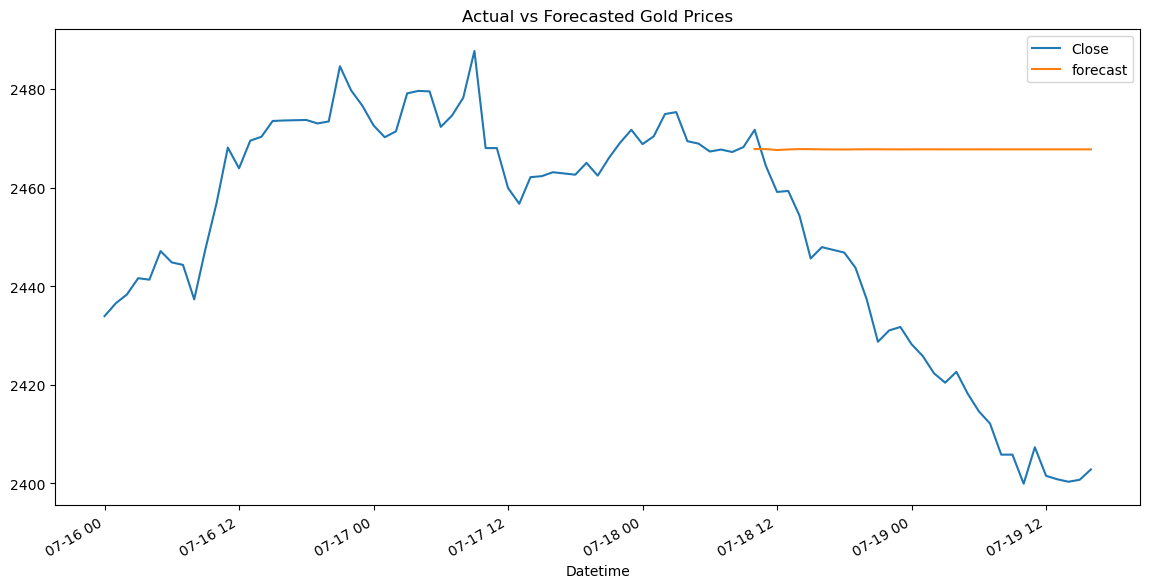

In [158]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Fetch the latest hourly data for the past 60 days
gold = yf.Ticker("GC=F")
data = gold.history(period="5d", interval="1h")

# Ensure there are no missing values
data = data.dropna()

# Fit ARIMA model
model = sm.tsa.ARIMA(data['Close'], order=(5, 1, 0))
results = model.fit()
print(results.summary())

# Predict future values
data['forecast'] = results.predict(start=len(data) - 30, end=len(data) - 1, dynamic=True)
data[['Close', 'forecast']].plot(figsize=(14, 7))
plt.title('Actual vs Forecasted Gold Prices')
plt.show()
